In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [158]:
df = pd.read_csv("/content/btc_1h.csv")

In [159]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


In [160]:
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329
...,...,...,...,...,...,...
35659,2022-01-31 01:30:00,37512.37,37740.00,37351.63,37684.45,1037.922560
35660,2022-01-31 02:30:00,37684.45,37762.60,37492.25,37729.00,874.060520
35661,2022-01-31 03:30:00,37729.00,37855.54,37625.41,37785.78,734.658550
35662,2022-01-31 04:30:00,37785.78,38230.00,37778.46,37881.76,1728.811800


In [161]:
df.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

<Axes: ylabel='close'>

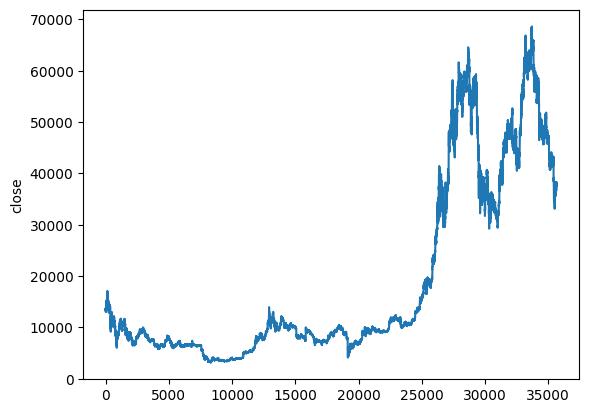

In [162]:
sns.lineplot(df['close'])

In [163]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [164]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [165]:
df = df.set_index('datetime')

In [166]:
x = df.drop(['close'], axis = 1)
y = df['close']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [168]:
x_test

,open,high,low,volume,year,month,day,hour,minute,second
datetime,,,,,,,,,,
2021-09-30 15:30:00,43147.37,43298.36,42697.01,1636.090470,2021,9,30,15,30,0
2020-12-13 13:30:00,19249.21,19322.24,19179.50,3622.141403,2020,12,13,13,30,0
2021-03-04 21:30:00,49412.60,50033.92,49300.01,2731.211319,2021,3,4,21,30,0
2020-04-30 19:30:00,8853.37,8896.00,8780.00,4452.102207,2020,4,30,19,30,0
2019-06-10 11:30:00,7631.91,7727.00,7631.91,1613.369545,2019,6,10,11,30,0
...,...,...,...,...,...,...,...,...,...,...
2018-12-28 18:30:00,3586.74,3590.94,3570.77,1691.220433,2018,12,28,18,30,0
2019-03-04 01:30:00,3807.52,3816.68,3805.90,351.139200,2019,3,4,1,30,0
2019-10-28 19:30:00,9357.54,9374.00,9292.71,2497.418638,2019,10,28,19,30,0


In [169]:
model =   XGBRegressor(random_state = 42)

In [170]:
#Training the model
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [171]:
#Predicting
y_pred = model.predict(x_test)

In [172]:
model.score(x_test, y_test)

0.999922858442205

In [173]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"The root mean squared error is: {np.sqrt(mse)}")
print(f"The mean absolute error is: {mae}")

The root mean squared error is: 157.84988732250508
The mean absolute error is: 79.75102843682093


In [174]:
pred = pd.DataFrame(y_pred, columns = ['close'])

In [175]:
pred

,close
0,43020.972656
1,19210.130859
2,49666.777344
3,8837.745117
4,7657.836914
...,...
7128,3565.749756
7129,3798.705811
7130,9343.397461
7131,5267.672852


In [176]:
x_test = x_test.reset_index()

In [147]:
actual = x_test.join(y_test)

In [155]:
#y_test = pd.DataFrame(y_test, columns = 'close')
y_test = y_test.reset_index

AttributeError: 'function' object has no attribute 'reset_index'